# What is the **hardest** course and hole on the DGPT 2024 MPO Tour? What is the **easiest** course and hole on the DGPT 2024 MPO Tour?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
import math
import seaborn as sns
from IPython.display import HTML

## Loading the data into Colab

In [3]:
#read tables
url = ["https://statmando.com/stats/tour-holes-2024-mpo",
       'https://statmando.com/stats/tour-holes-2023-mpo',
       'https://statmando.com/stats/tour-holes-2022-mpo',
       'https://statmando.com/stats/tour-holes-2021-mpo']

#one list for all years
all_years_dfs = []

#reading the html table on website using pandas
for i in url:
  #getting the year from url
  year = i.split('-')[-2]

  #reading html into df
  tables = pd.read_html(i)

  if tables:
    df_year = tables[0]
    #adding year column
    df_year['Year'] = year
    #appending to all years
    all_years_dfs.append(df_year)
  else:
    'N/a'


#concat to one df
df = pd.concat(all_years_dfs, ignore_index=True)

df

,Event,Layout,Hole #,Length,CiRDS,Avg,Hole Par,Avg to Par,uP %,Par %,oP %,Times Played,# uPar,# Pars,# oPar,Year
0,PDGA Professional Disc Golf World Championships,New London Worlds MPO,6,1215,394.0,6.18,5,1.18,2.92,26.52,70.56,411,12,109,290,2024
1,PDGA Champions Cup,MPO 2024 Champs Cup,12,1050,339.0,5.95,5,0.95,1.75,32.98,65.26,285,5,94,186,2024
2,Krokhol Open,Krokhol Open 2024 - MPO Rd3,8,791,379.0,4.88,4,0.88,4.63,33.33,62.04,108,5,36,67,2024
3,PDGA Professional Disc Golf World Championships,New London Worlds MPO,18,872,419.5,4.86,4,0.86,1.46,37.71,60.83,411,6,155,250,2024
4,PDGA Champions Cup,MPO 2024 Champs Cup,14,893,286.7,5.84,5,0.84,8.42,34.39,57.19,285,24,98,163,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Discraft Great Lakes Open,Toboggan Longs,11,370,337.0,2.99,3,-0.01,18.80,67.03,14.17,367,69,246,52,2021
2354,LWS Open at Idlewild,Idlewild Open 2021 MPO,3,407,374.0,2.99,3,-0.01,26.76,49.01,24.23,355,95,174,86,2021
2355,Delaware Disc Golf Challenge,MPO,13,360,327.0,2.99,3,-0.01,23.36,57.38,19.26,244,57,140,47,2021
2356,Las Vegas Challenge,Factory Store,1,415,382.0,2.99,3,-0.01,23.31,60.90,15.79,133,31,81,21,2021


## Descriptive statistics on the df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Event         2358 non-null   object 
 1   Layout        2358 non-null   object 
 2   Hole #        2358 non-null   int64  
 3   Length        2358 non-null   int64  
 4   CiRDS         2358 non-null   float64
 5   Avg           2358 non-null   float64
 6   Hole Par      2358 non-null   int64  
 7   Avg to Par    2358 non-null   float64
 8   uP %          2358 non-null   float64
 9   Par %         2358 non-null   float64
 10  oP %          2358 non-null   float64
 11  Times Played  2358 non-null   int64  
 12  # uPar        2358 non-null   int64  
 13  # Pars        2358 non-null   int64  
 14  # oPar        2358 non-null   int64  
 15  Year          2358 non-null   object 
dtypes: float64(6), int64(7), object(3)
memory usage: 294.9+ KB


Describing the variables

*   *Event* - Names the tournament on the PDGA Tour
*   *Layout* - The specific course layout used for the event
*   *Hole #* - Number hole
*   *Length* - The length of the hole in feet
*   *CiRDS* - "Circle in Regulation Distance per Shot", measuring the average distance to the basket after the first shot on a given hole
*   *Avg* - The average score shot on the hole
*   *Hole Par* - The par for the hole
*   *Avg to Par* - Average score relative to par (-0.5 means the avg score was a half stroke under par)
*   *uP %* - The percentage of scores under par (birdies or better)
*   *Par %* - The percentage of scores exactly par
*   *oP %* - The percentage of scores over par (bogeys or worse)
*   *Times Played* - the total number of times the hole was played during the tournament
*   *# uPar* - The number of under par scores
*   *# Pars* - The number of par scores
*   *# oPar* - The number of over par scores


In [5]:
df.describe()

,Hole #,Length,CiRDS,Avg,Hole Par,Avg to Par,uP %,Par %,oP %,Times Played,# uPar,# Pars,# oPar
count,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,9.500000,542.656064,330.095971,3.495475,3.555131,-0.059678,31.617740,48.231794,20.150437,245.164122,76.619169,118.783715,49.761238
std,5.189228,219.703072,64.989997,0.737376,0.625553,0.298142,16.041717,13.510187,11.795838,113.422398,54.847032,65.397027,40.013227
min,1.000000,197.000000,130.500000,2.150000,3.000000,-0.890000,0.000000,8.720000,0.000000,43.000000,0.000000,8.000000,0.000000
25%,5.000000,364.000000,286.500000,2.860000,3.000000,-0.260000,19.330000,39.310000,11.297500,150.000000,36.000000,66.000000,22.000000
50%,9.500000,480.000000,327.000000,3.340000,3.000000,-0.080000,30.575000,48.570000,18.195000,227.000000,63.000000,109.000000,39.000000
75%,14.000000,695.000000,371.875000,4.040000,4.000000,0.130000,42.370000,57.417500,26.942500,338.000000,106.000000,162.000000,66.000000
max,18.000000,1499.000000,599.000000,6.410000,5.000000,1.410000,86.360000,100.000000,79.010000,523.000000,418.000000,362.000000,290.000000


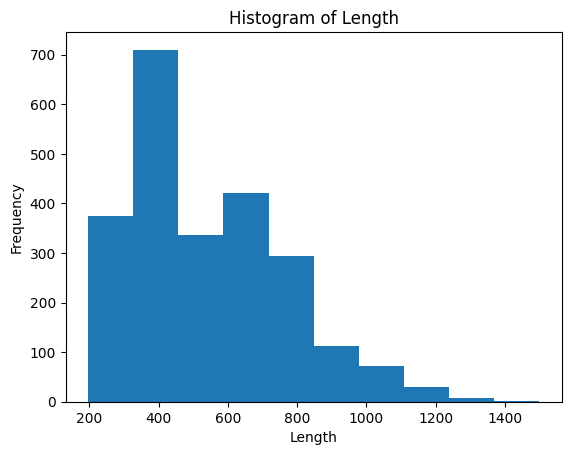

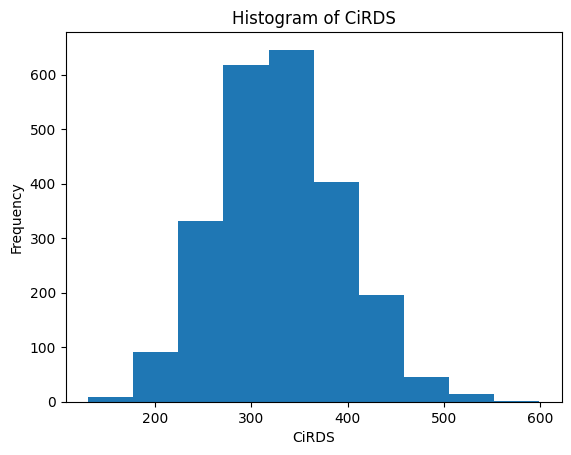

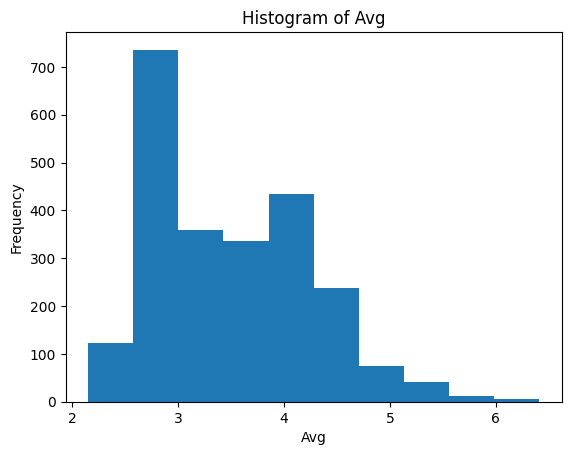

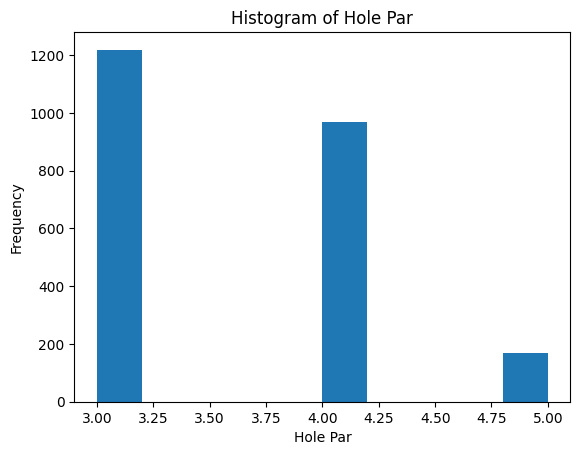

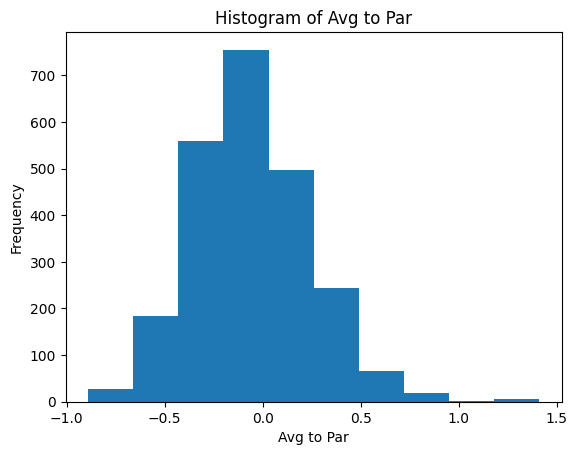

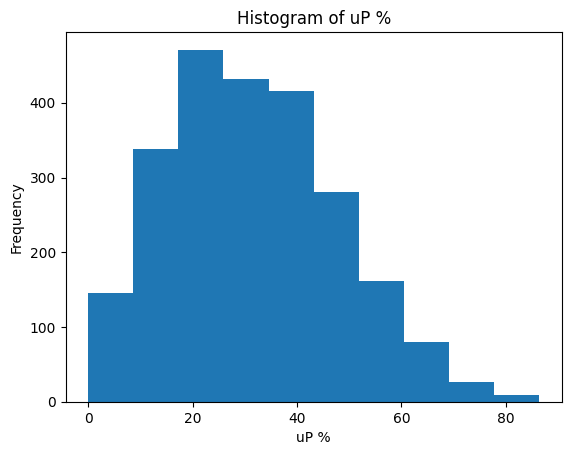

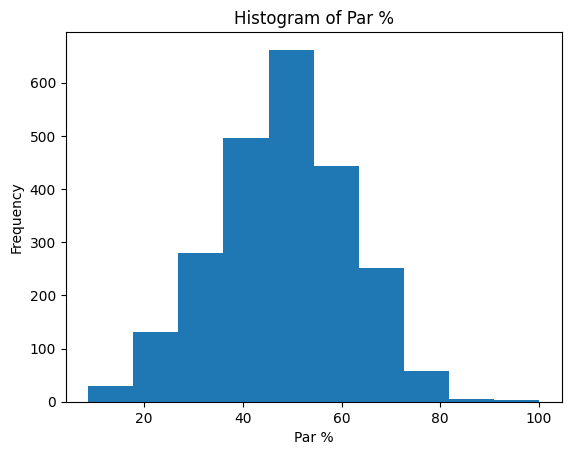

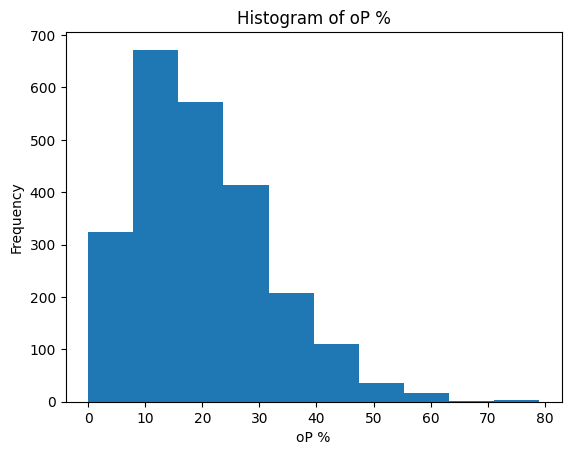

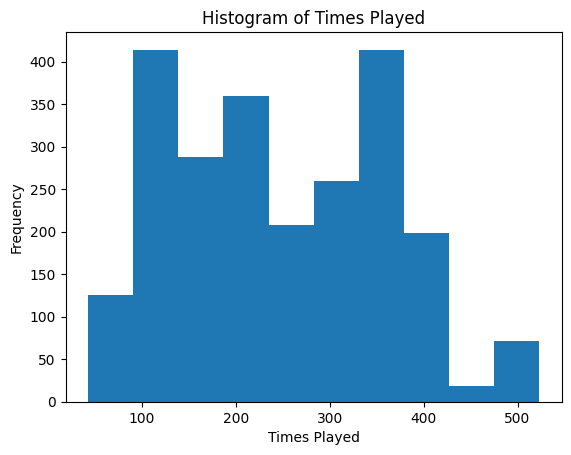

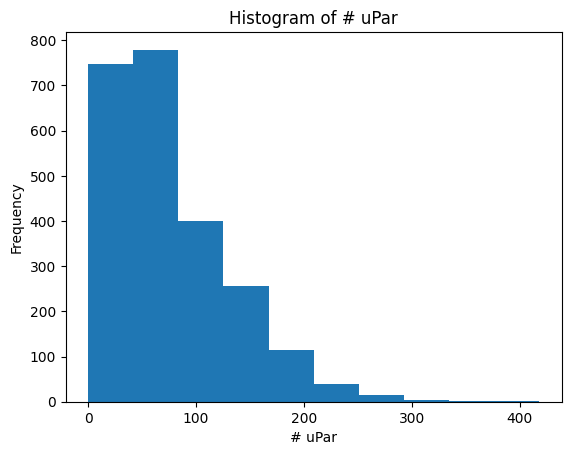

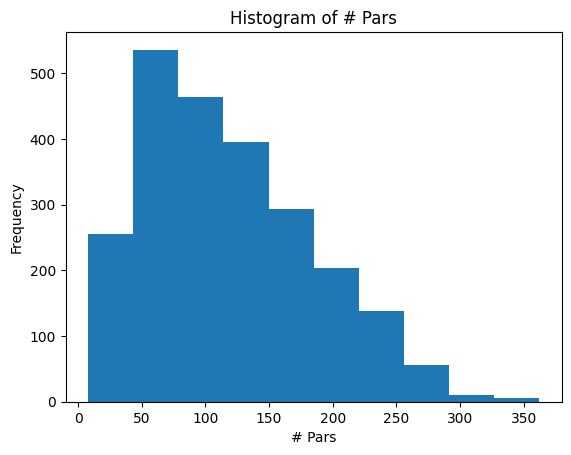

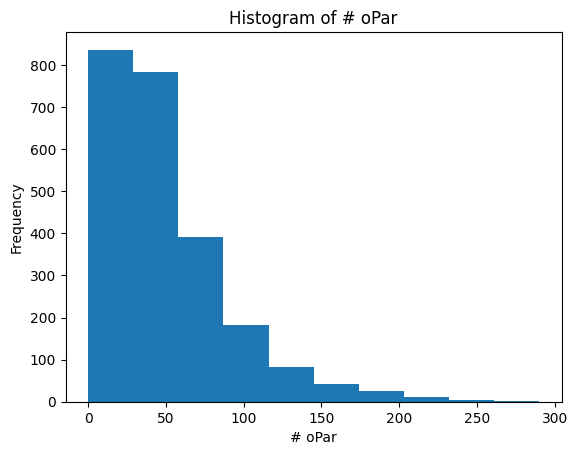

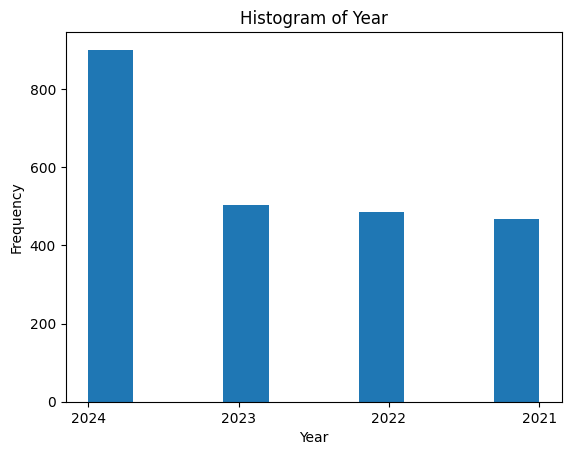

In [6]:
#cycle through continuous variables, histograms to understand distributions for each
for col in df.drop(columns=['Event', 'Layout', 'Hole #']).columns:
  plt.hist(df[col])
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

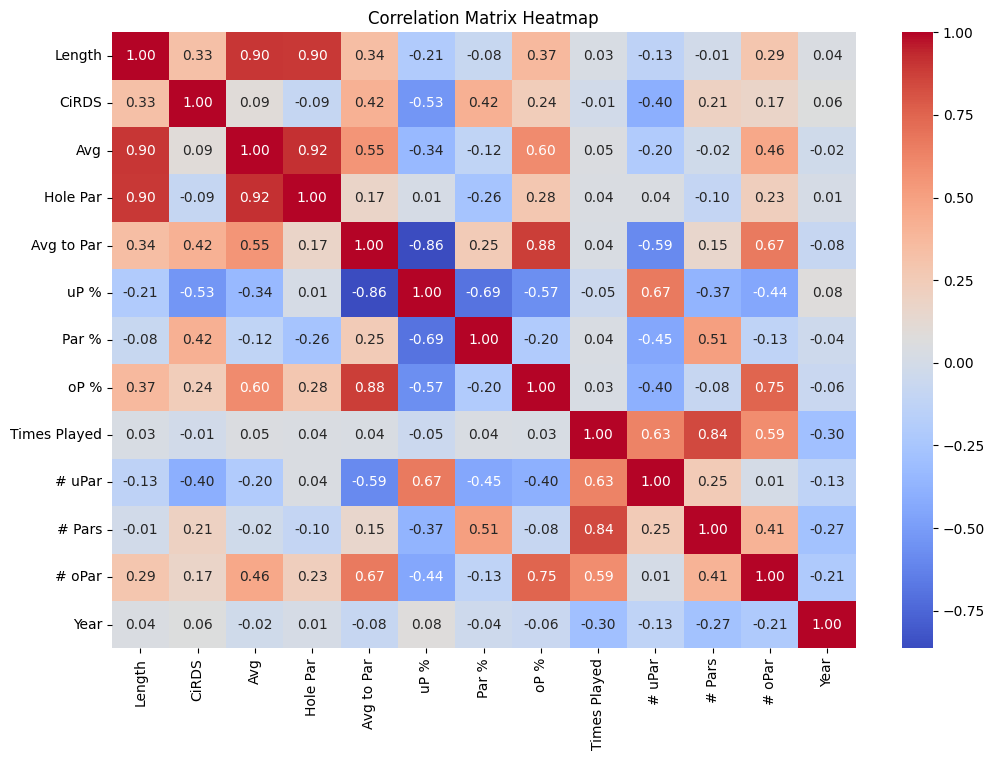

In [7]:
corr_matrix = df.drop(columns=['Event', 'Layout', 'Hole #']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Reddit poll - How do you determine the difficulty of a course?


[https://www.reddit.com/r/discgolf/comments/u0whi7/how_do_you_determine_the_difficulty_of_a_course/](https://www.reddit.com/r/discgolf/comments/u0whi7/how_do_you_determine_the_difficulty_of_a_course/)

In [8]:
poll_results = {
    'Method': ['Number of obstacles, OB, hazards, water, etc.',
               'Physical demands of a hole (elevation, length, wind exposure, heat)',
               'Typical scores relative to par',
               'Subjective feel, intangibles, overall layout',
               'Any other suggestions (comments)?'],
    'Votes': [115, 56, 136, 82, 2]
}

#manual importing poll into df
poll_df = pd.DataFrame(poll_results)

poll_df['Weights'] = poll_df['Votes'] / poll_df['Votes'].sum()
print(f"Total votes: {poll_df['Votes'].sum()}")

#print poll with some formatting
display(poll_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))

Total votes: 391


,Method,Votes,Weights
0,"Number of obstacles, OB, hazards, water, etc.",115,0.294118
1,"Physical demands of a hole (elevation, length, wind exposure, heat)",56,0.143223
2,Typical scores relative to par,136,0.347826
3,"Subjective feel, intangibles, overall layout",82,0.209719
4,Any other suggestions (comments)?,2,0.005115


*   Number of obstacles, OB, hazards, water, etc must be merged into this notebook
*   Physical demands of a hole is understood, apart from elevation
*   Typical scores relative to par we have!
*   Subjective feel, intangibles, overall layout could be sourced from player surveys, general surveys, UDisc

#### Implementing Drone Flyovers

#### Grab flyovers from GitHub

In [9]:
#importing flyovers
github_flyovers = 'https://tommygarner.github.io/projects/discgolf/holesandcourses/flyovers_incomplete.csv'
github_flyovers = pd.read_csv(github_flyovers)

github_flyovers['youtube_timestamp'] = github_flyovers['youtube_timestamp'].str.lstrip("'")
github_flyovers

,Event_Layout_Hole,youtube_url,youtube_timestamp
0,PDGA Professional Disc Golf World Championship...,https://www.youtube.com/watch?v=vx7rgMA4d0Q,25:12
1,PDGA Champions Cup - MPO 2024 Champs Cup - Hol...,https://www.youtube.com/watch?v=Y8AaJBECKMo,09:38
2,Krokhol Open - Krokhol Open 2024 - MPO Rd3 - H...,https://www.youtube.com/watch?v=xsgA0gHAgrI,27:41
3,PDGA Professional Disc Golf World Championship...,https://www.youtube.com/watch?v=1AYzGBSPz8w,40:05
4,PDGA Champions Cup - MPO 2024 Champs Cup - Hol...,https://www.youtube.com/watch?v=Y8AaJBECKMo,21:46
...,...,...,...
2353,Discraft Great Lakes Open - Toboggan Longs - H...,INSERT_YOUTUBE_URL_HERE,INSERT_TIMESTAMP_HERE
2354,LWS Open at Idlewild - Idlewild Open 2021 MPO ...,INSERT_YOUTUBE_URL_HERE,INSERT_TIMESTAMP_HERE
2355,Delaware Disc Golf Challenge - MPO - Hole 13,INSERT_YOUTUBE_URL_HERE,INSERT_TIMESTAMP_HERE
2356,Las Vegas Challenge - Factory Store - Hole 1,INSERT_YOUTUBE_URL_HERE,INSERT_TIMESTAMP_HERE


In [10]:
#standardize event - layout - hole columns
if 'Event_Layout_Hole' not in df.columns:
    df['Event_Layout_Hole'] = df['Event'] + ' - ' + df['Layout'] + ' - Hole ' + df['Hole #'].astype(str)

#merge dfs, left join
merged_df = pd.merge(df, github_flyovers, on='Event_Layout_Hole', how='left')

#drop duplicated columns, renaming
merged_df.rename(columns={'youtube_url_y': 'youtube_url', 'youtube_timestamp_y': 'youtube_timestamp'}, inplace=True)

display(merged_df.head())

,Event,Layout,Hole #,Length,CiRDS,Avg,Hole Par,Avg to Par,uP %,Par %,oP %,Times Played,# uPar,# Pars,# oPar,Year,Event_Layout_Hole,youtube_url,youtube_timestamp
0,PDGA Professional Disc Golf World Championships,New London Worlds MPO,6,1215,394.0,6.18,5,1.18,2.92,26.52,70.56,411,12,109,290,2024,PDGA Professional Disc Golf World Championship...,https://www.youtube.com/watch?v=vx7rgMA4d0Q,25:12
1,PDGA Champions Cup,MPO 2024 Champs Cup,12,1050,339.0,5.95,5,0.95,1.75,32.98,65.26,285,5,94,186,2024,PDGA Champions Cup - MPO 2024 Champs Cup - Hol...,https://www.youtube.com/watch?v=Y8AaJBECKMo,09:38
2,Krokhol Open,Krokhol Open 2024 - MPO Rd3,8,791,379.0,4.88,4,0.88,4.63,33.33,62.04,108,5,36,67,2024,Krokhol Open - Krokhol Open 2024 - MPO Rd3 - H...,https://www.youtube.com/watch?v=xsgA0gHAgrI,27:41
3,PDGA Professional Disc Golf World Championships,New London Worlds MPO,18,872,419.5,4.86,4,0.86,1.46,37.71,60.83,411,6,155,250,2024,PDGA Professional Disc Golf World Championship...,https://www.youtube.com/watch?v=1AYzGBSPz8w,40:05
4,PDGA Champions Cup,MPO 2024 Champs Cup,14,893,286.7,5.84,5,0.84,8.42,34.39,57.19,285,24,98,163,2024,PDGA Champions Cup - MPO 2024 Champs Cup - Hol...,https://www.youtube.com/watch?v=Y8AaJBECKMo,21:46


In [11]:
#transform timestamp to seconds
def timestamp_to_seconds(timestamp):
    #check for str
    if isinstance(timestamp, str):
        #strip and split timestamp into min, sec
        timestamp = timestamp.lstrip("'")
        parts = timestamp.split(':')
        try:
            if len(parts) == 2:
                minutes = int(parts[0])
                seconds = int(parts[1])
                return minutes * 60 + seconds
            elif len(parts) == 3:
                hours = int(parts[0])
                minutes = int(parts[1])
                seconds = int(parts[2])
                return hours * 3600 + minutes * 60 + seconds
        except ValueError:
            return np.nan
    return np.nan

#apply function
merged_df['youtube_timestamp_seconds'] = merged_df['youtube_timestamp'].apply(timestamp_to_seconds)

display(merged_df.head())

,Event,Layout,Hole #,Length,CiRDS,Avg,Hole Par,Avg to Par,uP %,Par %,oP %,Times Played,# uPar,# Pars,# oPar,Year,Event_Layout_Hole,youtube_url,youtube_timestamp,youtube_timestamp_seconds
0,PDGA Professional Disc Golf World Championships,New London Worlds MPO,6,1215,394.0,6.18,5,1.18,2.92,26.52,70.56,411,12,109,290,2024,PDGA Professional Disc Golf World Championship...,https://www.youtube.com/watch?v=vx7rgMA4d0Q,25:12,1512.0
1,PDGA Champions Cup,MPO 2024 Champs Cup,12,1050,339.0,5.95,5,0.95,1.75,32.98,65.26,285,5,94,186,2024,PDGA Champions Cup - MPO 2024 Champs Cup - Hol...,https://www.youtube.com/watch?v=Y8AaJBECKMo,09:38,578.0
2,Krokhol Open,Krokhol Open 2024 - MPO Rd3,8,791,379.0,4.88,4,0.88,4.63,33.33,62.04,108,5,36,67,2024,Krokhol Open - Krokhol Open 2024 - MPO Rd3 - H...,https://www.youtube.com/watch?v=xsgA0gHAgrI,27:41,1661.0
3,PDGA Professional Disc Golf World Championships,New London Worlds MPO,18,872,419.5,4.86,4,0.86,1.46,37.71,60.83,411,6,155,250,2024,PDGA Professional Disc Golf World Championship...,https://www.youtube.com/watch?v=1AYzGBSPz8w,40:05,2405.0
4,PDGA Champions Cup,MPO 2024 Champs Cup,14,893,286.7,5.84,5,0.84,8.42,34.39,57.19,285,24,98,163,2024,PDGA Champions Cup - MPO 2024 Champs Cup - Hol...,https://www.youtube.com/watch?v=Y8AaJBECKMo,21:46,1306.0


## Grouping and Standardizing by Event and Layout

In [12]:
#standardize northwood black
northwood_layouts_to_standardize = ['Black', 'Black Long']
standard_northwood_event = 'Discraft Ledgestone Open'
standard_northwood_layout = 'Northwood Black'

condition_northwood = (merged_df['Event'] == standard_northwood_event) & \
                      (merged_df['Layout'].isin(northwood_layouts_to_standardize))

merged_df.loc[condition_northwood, 'Event'] = standard_northwood_event
merged_df.loc[condition_northwood, 'Layout'] = standard_northwood_layout

#standardize erueka temp
eureka_layouts_to_standardize = ['Eureka Temp - A pins', 'Eureka Temp - B pins']
standard_eureka_event = 'Discraft Ledgestone Open'
standard_eureka_layout = 'Eureka Temp'

condition_eureka = (merged_df['Event'] == standard_eureka_event) & \
                   (merged_df['Layout'].isin(eureka_layouts_to_standardize))

merged_df.loc[condition_eureka, 'Event'] = standard_eureka_event
merged_df.loc[condition_eureka, 'Layout'] = standard_eureka_layout

#recreate combined key column
merged_df['Event_Layout_Hole'] = merged_df['Event'] + ' - ' + merged_df['Layout'] + ' - Hole ' + merged_df['Hole #'].astype(str)

#standardize pickard park
pickard_layouts_to_standardize = ['Pickard Park Gold Rd1', 'Pickard Park Gold', 'Gold', 'Pickard Gold']
standard_pickard_event = 'Discmania Challenge'
standard_pickard_layout = 'Pickard Park'

# Identify rows with the Pickard layouts to standardize
condition_pickard = (merged_df['Event'] == standard_pickard_event) & \
                      (merged_df['Layout'].isin(pickard_layouts_to_standardize))

# Update the 'Event' and 'Layout' columns for these rows
merged_df.loc[condition_pickard, 'Event'] = standard_pickard_event
merged_df.loc[condition_pickard, 'Layout'] = standard_pickard_layout

#standardize toboggan
toboggan_layouts_to_standardize = ['Toboggan MPO A Pins 2/11', 'Toboggan MPO B Pins 2/11', 'Toboggan MPO B Pins 1/2/11', 'Toboggan MPO A Pins 1/2/11', 'Toboggan MPO', 'Toboggan Longs']
standard_toboggan_event = 'Discraft Great Lakes Open'
standard_toboggan_layout = 'Toboggan'

# Identify rows with the Toboggan layouts to standardize
condition_toboggan = (merged_df['Event'] == standard_toboggan_event) & \
                      (merged_df['Layout'].isin(toboggan_layouts_to_standardize))

merged_df.loc[condition_toboggan, 'Event'] = standard_toboggan_event
merged_df.loc[condition_toboggan, 'Layout'] = standard_toboggan_layout

#standardize champions landing
champions_layouts_to_standardize = ['Champs MPO']
standard_dynamic_event = 'Dynamic Discs Open'
standard_dynamic_layout = 'Champions Landing'

condition_champions = (merged_df['Event'] == standard_dynamic_event) & \
                      (merged_df['Layout'].isin(champions_layouts_to_standardize))

merged_df.loc[condition_champions, 'Event'] = standard_dynamic_event
merged_df.loc[condition_champions, 'Layout'] = standard_dynamic_layout

#standardize emporia country club
ecc_layouts_to_standardize = ['ECC MPO', 'ECC MPO', 'ECC Longs', 'ECC - 2022 MPO']
standard_ecc_event = 'Dynamic Discs Open'
standard_ecc_layout = 'Emporia Country Club'

condition_ecc = (merged_df['Event'] == standard_ecc_event) & \
                      (merged_df['Layout'].isin(ecc_layouts_to_standardize))

merged_df.loc[condition_ecc, 'Event'] = standard_ecc_event
merged_df.loc[condition_ecc, 'Layout'] = standard_ecc_layout

#standardize jones supreme
supreme_layouts_to_standardize = ['Jones Gold Long Layout', 'Supreme 18 - 2022 MPO']
standard_supreme_event = 'Dynamic Discs Open'
standard_supreme_layout = 'Jones Supreme'

condition_supreme = (merged_df['Event'] == standard_supreme_event) & \
                      (merged_df['Layout'].isin(supreme_layouts_to_standardize))

merged_df.loc[condition_supreme, 'Event'] = standard_supreme_event
merged_df.loc[condition_supreme, 'Layout'] = standard_supreme_layout

#standardize the beast
beast_layouts_to_standardize = ['23 EO MPO', 'European Open 2022', 'The Beast - MPO Layout']
standard_nokia_event = 'European Open'
standard_nokia_layout = 'The Beast'

condition_beast = (merged_df['Event'] == standard_nokia_event) & \
                      (merged_df['Layout'].isin(beast_layouts_to_standardize))

merged_df.loc[condition_beast, 'Event'] = standard_nokia_event
merged_df.loc[condition_beast, 'Layout'] = standard_nokia_layout

#standardize the monster
monster_layouts_to_standardize = ['Monster MPO - European Open 2024', 'Monster']
standard_monster_event = 'European Open'
standard_monster_layout = 'The Monster'

condition_monster = (merged_df['Event'] == standard_monster_event) & \
                      (merged_df['Layout'].isin(monster_layouts_to_standardize))

merged_df.loc[condition_monster, 'Event'] = standard_monster_event
merged_df.loc[condition_monster, 'Layout'] = standard_monster_layout

#standardize brewster ridge
brewster_layouts_to_standardize = ['2024 DGPT Playoffs: GMC Brewster MPO', 'DGPT Playoffs - Brewster MPO', '2021 GMC MPO Brewster']
standard_brewster_event = 'Green Mountain Championship'
standard_brewster_layout = 'Brewster Ridge'

condition_brewster = (merged_df['Event'] == standard_brewster_event) & \
                      (merged_df['Layout'].isin(brewster_layouts_to_standardize))

merged_df.loc[condition_brewster, 'Event'] = standard_brewster_event
merged_df.loc[condition_brewster, 'Layout'] = standard_brewster_layout

#standardize fox run
fox_run_layouts_to_standardize = ['DGPT Playoffs - Fox Run MPO', '2021 GMC MPO Fox Run']
standard_fox_run_event = 'Green Mountain Championship'
standard_fox_run_layout = 'Fox Run'

condition_fox_run = (merged_df['Event'] == standard_fox_run_event) & \
                      (merged_df['Layout'].isin(fox_run_layouts_to_standardize))

merged_df.loc[condition_fox_run, 'Event'] = standard_fox_run_event
merged_df.loc[condition_fox_run, 'Layout'] = standard_fox_run_layout

#standardize disc side of heaven
disc_side_of_heaven_layouts_to_standardize = ['MPO', '2021 DGPT JBO MPO Layout']
standard_disc_side_of_heaven_event = 'Jonesboro Open'
standard_disc_side_of_heaven_layout = 'Disc Side of Heaven'

condition_disc_side_of_heaven = (merged_df['Event'] == standard_disc_side_of_heaven_event) & \
                      (merged_df['Layout'].isin(disc_side_of_heaven_layouts_to_standardize))

merged_df.loc[condition_disc_side_of_heaven, 'Event'] = standard_disc_side_of_heaven_event
merged_df.loc[condition_disc_side_of_heaven, 'Layout'] = standard_disc_side_of_heaven_layout

#standardize krokhol
krokhol_layouts_to_standardize = ['Krokhol Open 2024 - MPO']
standard_krokhol_event = 'Krokhol Open'
standard_krokhol_layout = 'Krokhol Disc Golf Parc'

condition_krokhol = (merged_df['Event'] == standard_krokhol_event) & \
                      (merged_df['Layout'].isin(krokhol_layouts_to_standardize))

merged_df.loc[condition_krokhol, 'Event'] = standard_krokhol_event
merged_df.loc[condition_krokhol, 'Layout'] = standard_krokhol_layout

#standardize idlewild
lws_open_layouts_to_standardize = ['LWS Open 2024 MPO', 'LWS Open 2023 MPO', 'LWS Open 2022 MPO', 'Idlewild Open 2021 MPO']
lws_open_event = 'LWS Open at Idlewild'
lws_open_layout = 'Idlewild DGC'

condition_lws_open = (merged_df['Event'] == lws_open_event) & \
                      (merged_df['Layout'].isin(lws_open_layouts_to_standardize))

merged_df.loc[condition_lws_open, 'Event'] = lws_open_event
merged_df.loc[condition_lws_open, 'Layout'] = lws_open_layout

#standardize infinite discs
infinite_layouts_to_standardize = ['2022 LVC Course Infinite Men', 'Infinite', ]
infinite_event = 'Las Vegas Challenge'
infinite_layout = 'Infinite Discs'

condition_infinite = (merged_df['Event'] == infinite_event) & \
                      (merged_df['Layout'].isin(infinite_layouts_to_standardize))

merged_df.loc[condition_infinite, 'Event'] = infinite_event
merged_df.loc[condition_infinite, 'Layout'] = infinite_layout

#standardize millenium
millenium_layouts_to_standardize = ['2023 LVC Course Millennium Men']
millenium_event = 'Las Vegas Challenge'
millenium_layout = 'Millenium'

condition_millenium = (merged_df['Event'] == millenium_event) & \
                      (merged_df['Layout'].isin(millenium_layouts_to_standardize))

merged_df.loc[condition_millenium, 'Event'] = millenium_event
merged_df.loc[condition_millenium, 'Layout'] = millenium_layout

#standardize innova discs
innova_discs_layouts_to_standardize = ['2023 LVC Course Innova Champion Men', '2022 LVC Course Innova Men', 'Innova']
innova_discs_event = 'Las Vegas Challenge'
innova_discs_layout = 'Innova Discs'

condition_innova_discs = (merged_df['Event'] == innova_discs_event) & \
                      (merged_df['Layout'].isin(innova_discs_layouts_to_standardize))

merged_df.loc[condition_innova_discs, 'Event'] = innova_discs_event
merged_df.loc[condition_innova_discs, 'Layout'] = innova_discs_layout

#standardize factory store
factory_store_layouts_to_standardize = ['2022 LVC Course Factory Men']
factory_store_event = 'Las Vegas Challenge'
factory_store_layout = 'Factory Store'

condition_factory_store = (merged_df['Event'] == factory_store_event) & \
                      (merged_df['Layout'].isin(factory_store_layouts_to_standardize))

merged_df.loc[condition_factory_store, 'Event'] = factory_store_event
merged_df.loc[condition_factory_store, 'Layout'] = factory_store_layout

#standardize maple hill
maple_hill_layouts_to_standardize = ['DGPT Playoffs - 2024 MVP Open Gold B', 'DGPT Playoffs - 2024 MVP Open Gold A', 'DGPT Playoffs - 2023 MVP Open Gold A', 'DGPT Playoffs - 2022 MVP Open Golds', 'Gold - 2021 MVP Open']
maple_hill_event = 'MVP Open'
maple_hill_layout = 'Maple Hill'

condition_maple_hill = (merged_df['Event'] == maple_hill_event) & \
                      (merged_df['Layout'].isin(maple_hill_layouts_to_standardize))

merged_df.loc[condition_maple_hill, 'Event'] = maple_hill_event
merged_df.loc[condition_maple_hill, 'Layout'] = maple_hill_layout

#standardize cedar hill
cedar_hill_layouts_to_standardize = ['2021 MCO Cedar Hill MPO']
cedar_hill_event = 'Music City Open'
cedar_hill_layout = 'Cedar Hill'

condition_cedar_hill = (merged_df['Event'] == cedar_hill_event) & \
                      (merged_df['Layout'].isin(cedar_hill_layouts_to_standardize))

merged_df.loc[condition_cedar_hill, 'Event'] = cedar_hill_event
merged_df.loc[condition_cedar_hill, 'Layout'] = cedar_hill_layout

#standardize mill ridge
mill_ridge_layouts_to_standardize = ['2024 MCO MPO', '2023 MCO MPO', '2021 MCO Mill Ridge MPO']
mill_ridge_event = 'Music City Open'
mill_ridge_layout = 'Mill Ridge'

condition_mill_ridge = (merged_df['Event'] == mill_ridge_event) & \
                      (merged_df['Layout'].isin(mill_ridge_layouts_to_standardize))

merged_df.loc[condition_mill_ridge, 'Event'] = mill_ridge_event
merged_df.loc[condition_mill_ridge, 'Layout'] = mill_ridge_layout

#standardize glendoveer
portland_open_layouts_to_standardize = ['Glendoveer - MPO', 'MPO']
standard_portland_open_event = 'Northwest DGC'
standard_portland_open_layout = 'Glendoveer'

condition_portland_open = (merged_df['Event'] == standard_portland_open_event) & \
                      (merged_df['Layout'].isin(portland_open_layouts_to_standardize))

merged_df.loc[condition_portland_open, 'Event'] = standard_portland_open_event
merged_df.loc[condition_portland_open, 'Layout'] = standard_portland_open_layout

#standardize glendoveer east
glendoveer_e_layouts_to_standardize = ['Glendoveer East MPO - 2023 PDXO', 'Glendoveer MPO - 2022 DGPT PDXO']
standard_glendoveer_e_event = 'Northwest DGC'
standard_glendoveer_e_layout = 'Glendoveer East'

condition_glendoveer_e = (merged_df['Event'] == standard_glendoveer_e_event) & \
                      (merged_df['Layout'].isin(glendoveer_e_layouts_to_standardize))

merged_df.loc[condition_glendoveer_e, 'Event'] = standard_glendoveer_e_event
merged_df.loc[condition_glendoveer_e, 'Layout'] = standard_glendoveer_e_layout

#standardize glendoveer west
glendoveer_w_layouts_to_standardize = ['Glendoveer West MPO - 2023 PDXO']
standard_glendoveer_w_event = 'Northwest DGC'
standard_glendoveer_w_layout = 'Glendoveer West'

condition_glendoveer_w = (merged_df['Event'] == standard_glendoveer_w_event) & \
                      (merged_df['Layout'].isin(glendoveer_w_layouts_to_standardize))

merged_df.loc[condition_glendoveer_w, 'Event'] = standard_glendoveer_w_event
merged_df.loc[condition_glendoveer_w, 'Layout'] = standard_glendoveer_w_layout

#standardize blue lake park
blue_lake_park_layouts_to_standardize = ['2022 DGPT Portland Open - MPO']
standard_blue_lake_park_event = 'Northwest DGC'
standard_blue_lake_park_layout = 'Blue Lake Park'

condition_blue_lake_park = (merged_df['Event'] == standard_blue_lake_park_event) & \
                      (merged_df['Layout'].isin(blue_lake_park_layouts_to_standardize))

merged_df.loc[condition_blue_lake_park, 'Event'] = standard_blue_lake_park_event
merged_df.loc[condition_blue_lake_park, 'Layout'] = standard_blue_lake_park_layout

#standardize milo
milo_layouts_to_standardize = ['Milo Gold MPO']
standard_milo_event = 'Northwest DGC'
standard_milo_layout = 'Milo McIver Riverbend Gold'

condition_milo = (merged_df['Event'] == standard_milo_event) & \
                      (merged_df['Layout'].isin(milo_layouts_to_standardize))

merged_df.loc[condition_milo, 'Event'] = standard_milo_event
merged_df.loc[condition_milo, 'Layout'] = standard_milo_layout

#standardize swenson park
swenson_layouts_to_standardize = ['Blue Fr/Su', 'Blue Saturday', '2023 OTB Open - Blue Layout',
       'OTB Open AM - Blue', 'OTB Open DGPT - GOLD']
standard_swenson_event = 'OTB Open'
standard_swenson_layout = 'Swenson Park DGC'

condition_swenson = (merged_df['Event'] == standard_swenson_event) & \
                      (merged_df['Layout'].isin(swenson_layouts_to_standardize))

merged_df.loc[condition_swenson, 'Event'] = standard_swenson_event
merged_df.loc[condition_swenson, 'Layout'] = standard_swenson_layout

#standardize overas
overas_layouts_to_standardize = ['PCS Open 2023 MPO']
standard_overas_event = 'PCS Open'
standard_overas_layout = 'Overas Diskgolfpark'

condition_overas = (merged_df['Event'] == standard_overas_event) & \
                      (merged_df['Layout'].isin(overas_layouts_to_standardize))

merged_df.loc[condition_overas, 'Event'] = standard_overas_event
merged_df.loc[condition_overas, 'Layout'] = standard_overas_layout

#standardize wr jackson
wr_jackson_layouts_to_standardize = ['2023 PDGA Champions Cup MPO', 'Champions Cup Long MPO']
standard_wr_jackson_event = 'PDGA Champions Cup'
standard_wr_jackson_layout = 'WR Jackson Memorial Course'

condition_wr_jackson = (merged_df['Event'] == standard_wr_jackson_event) & \
                      (merged_df['Layout'].isin(wr_jackson_layouts_to_standardize))

merged_df.loc[condition_wr_jackson, 'Event'] = standard_wr_jackson_event
merged_df.loc[condition_wr_jackson, 'Layout'] = standard_wr_jackson_layout

#standardize northwood park
northwood_park_layouts_to_standardize = ['MPO 2024 Champs Cup', 'MPO 2024 Champs Cup Finals']
standard_northwood_park_event = 'PDGA Champions Cup'
standard_northwood_park_layout = 'Northwood Park'

condition_northwood_park = (merged_df['Event'] == standard_northwood_park_event) & \
                      (merged_df['Layout'].isin(northwood_park_layouts_to_standardize))

merged_df.loc[condition_northwood_park, 'Event'] = standard_northwood_park_event
merged_df.loc[condition_northwood_park, 'Layout'] = standard_northwood_park_layout

#standardize new london
new_london_layouts_to_standardize = ['New London Worlds MPO']
standard_new_london_event = 'PDGA Professional Disc Golf World Championships'
standard_new_london_layout = 'New London'

condition_new_london = (merged_df['Event'] == standard_new_london_event) & \
                      (merged_df['Layout'].isin(new_london_layouts_to_standardize))

merged_df.loc[condition_new_london, 'Event'] = standard_new_london_event
merged_df.loc[condition_new_london, 'Layout'] = standard_new_london_layout

#standardize ivy hill
ivy_hill_layouts_to_standardize = ['Ivy Hill Worlds MPO']
standard_ivy_hill_event = 'PDGA Professional Disc Golf World Championships'
standard_ivy_hill_layout = 'Ivy Hill'

condition_ivy_hill = (merged_df['Event'] == standard_ivy_hill_event) & \
                      (merged_df['Layout'].isin(ivy_hill_layouts_to_standardize))

merged_df.loc[condition_ivy_hill, 'Event'] = standard_ivy_hill_event
merged_df.loc[condition_ivy_hill, 'Layout'] = standard_ivy_hill_layout

#standardize brewster ridge
brewster_ridge_layouts_to_standardize = ['Brewster Ridge - MPO Worlds']
standard_brewster_ridge_event = 'PDGA Professional Disc Golf World Championships'
standard_brewster_ridge_layout = 'Brewster Ridge'

condition_brewster_ridge = (merged_df['Event'] == standard_brewster_ridge_event) & \
                      (merged_df['Layout'].isin(brewster_ridge_layouts_to_standardize))

merged_df.loc[condition_brewster_ridge, 'Event'] = standard_brewster_ridge_event
merged_df.loc[condition_brewster_ridge, 'Layout'] = standard_brewster_ridge_layout

#standardize fox run
fox_run_2_layouts_to_standardize = ['Fox Run - MPO Worlds']
standard_fox_run_2_event = 'PDGA Professional Disc Golf World Championships'
standard_fox_run_2_layout = 'Fox Run'

condition_fox_run_2 = (merged_df['Event'] == standard_fox_run_2_event) & \
                      (merged_df['Layout'].isin(fox_run_2_layouts_to_standardize))

merged_df.loc[condition_fox_run_2, 'Event'] = standard_fox_run_2_event
merged_df.loc[condition_fox_run_2, 'Layout'] = standard_fox_run_2_layout

#standardize emporia country club
emporia_country_club_layouts_to_standardize = ['ECC MPO']
standard_emporia_country_club_event = 'PDGA Professional Disc Golf World Championships'
standard_emporia_country_club_layout = 'Emporia Country Club'

condition_emporia_country_club = (merged_df['Event'] == standard_emporia_country_club_event) & \
                      (merged_df['Layout'].isin(emporia_country_club_layouts_to_standardize))

merged_df.loc[condition_emporia_country_club, 'Event'] = standard_emporia_country_club_event
merged_df.loc[condition_emporia_country_club, 'Layout'] = standard_emporia_country_club_layout

#standardize supreme 18 jones park
jones_park_layouts_to_standardize = ['Jones MPO']
standard_jones_park_event = 'PDGA Professional Disc Golf World Championships'
standard_jones_park_layout = 'Supreme 18 Jones Park'

condition_jones_park = (merged_df['Event'] == standard_jones_park_event) & \
                      (merged_df['Layout'].isin(jones_park_layouts_to_standardize))

merged_df.loc[condition_jones_park, 'Event'] = standard_jones_park_event
merged_df.loc[condition_jones_park, 'Layout'] = standard_jones_park_layout

#standardize fort buenaventura
fort_buenaventura_layouts_to_standardize = ['Fort MPO']
standard_fort_buenaventura_event = 'PDGA Professional Disc Golf World Championships'
standard_fort_buenaventura_layout = 'Fort Buenaventura'

condition_fort_buenaventura = (merged_df['Event'] == standard_fort_buenaventura_event) & \
                      (merged_df['Layout'].isin(fort_buenaventura_layouts_to_standardize))

merged_df.loc[condition_fort_buenaventura, 'Event'] = standard_fort_buenaventura_event
merged_df.loc[condition_fort_buenaventura, 'Layout'] = standard_fort_buenaventura_layout

#standardize mulligans
mulligans_layouts_to_standardize = ['Mulligan MPO']
standard_mulligans_event = 'PDGA Professional Disc Golf World Championships'
standard_mulligans_layout = 'Mulligans'

condition_mulligans = (merged_df['Event'] == standard_mulligans_event) & \
                      (merged_df['Layout'].isin(mulligans_layouts_to_standardize))

merged_df.loc[condition_mulligans, 'Event'] = standard_mulligans_event
merged_df.loc[condition_mulligans, 'Layout'] = standard_mulligans_layout

#standardize olympus
olympus_layouts_to_standardize = ['Chess.com MPO', 'Chess.com MPO Rd1']
standard_olympus_event = 'Supreme Flight Open'
standard_olympus_layout = 'Olympus DGC'

condition_olympus = (merged_df['Event'] == standard_olympus_event) & \
                      (merged_df['Layout'].isin(olympus_layouts_to_standardize))

merged_df.loc[condition_olympus, 'Event'] = standard_olympus_event
merged_df.loc[condition_olympus, 'Layout'] = standard_olympus_layout

#standardize ymers
ymers_layouts_to_standardize = ['DGPT 2024 - MPO Rd3', 'DGPT 2024 - MPO']
standard_ymers_event = 'Swedish Open'
standard_ymers_layout = 'Ymers Frisbeegolfbana'

condition_ymers = (merged_df['Event'] == standard_ymers_event) & \
                      (merged_df['Layout'].isin(ymers_layouts_to_standardize))

merged_df.loc[condition_ymers, 'Event'] = standard_ymers_event
merged_df.loc[condition_ymers, 'Layout'] = standard_ymers_layout

#standardize brock park
brock_park_layouts_to_standardize = ['Brock Premiere - Texas States presented by Lone Star Disc Rd1',
       'Brock Premiere - Texas States presented by Lone Star Disc']
standard_brock_park_event = 'Texas State Disc Golf Championship'
standard_brock_park_layout = 'Brock Park'

condition_brock_park = (merged_df['Event'] == standard_brock_park_event) & \
                      (merged_df['Layout'].isin(brock_park_layouts_to_standardize))

merged_df.loc[condition_brock_park, 'Event'] = standard_brock_park_event
merged_df.loc[condition_brock_park, 'Layout'] = standard_brock_park_layout

#standardize the thorn
the_thorn_layouts_to_standardize = ['Thorn Long']
standard_the_thorn_event = 'Texas State Disc Golf Championship'
standard_the_thorn_layout = 'The Thorn'

condition_the_thorn = (merged_df['Event'] == standard_the_thorn_event) & \
                      (merged_df['Layout'].isin(the_thorn_layouts_to_standardize))

merged_df.loc[condition_the_thorn, 'Event'] = standard_the_thorn_event
merged_df.loc[condition_the_thorn, 'Layout'] = standard_the_thorn_layout

#standardize dogwood
dogwood_layouts_to_standardize = ['Dogwood Long']
standard_dogwood_event = 'Texas State Disc Golf Championship'
standard_dogwood_layout = 'Dogwood'

condition_dogwood = (merged_df['Event'] == standard_dogwood_event) & \
                      (merged_df['Layout'].isin(dogwood_layouts_to_standardize))

merged_df.loc[condition_dogwood, 'Event'] = standard_dogwood_event
merged_df.loc[condition_dogwood, 'Layout'] = standard_dogwood_layout

#standardize harvey penick
harvey_penick_layouts_to_standardize = ['The Open course at Harvey Penick - MPO Rd3',
       'The Open course at Harvey Penick - MPO',
       'The Open course at Harvey Penick - MPO Rd2',
       'The Open Course at Harvey Penick - MPO']
standard_harvey_penick_event = 'The Open at Austin'
standard_harvey_penick_layout = 'Harvey Penick'

condition_harvey_penick = (merged_df['Event'] == standard_harvey_penick_event) & \
                      (merged_df['Layout'].isin(harvey_penick_layouts_to_standardize))

merged_df.loc[condition_harvey_penick, 'Event'] = standard_harvey_penick_event
merged_df.loc[condition_harvey_penick, 'Layout'] = standard_harvey_penick_layout

#standardize black bear
black_bear_layouts_to_standardize = ['MPO', 'Black Bear MPO',
       'Airborn Disc Golf Preserve - DGPT Black Bear MPO']
standard_black_bear_event = 'The Preserve Championship'
standard_black_bear_layout = 'Black Bear'

condition_black_bear = (merged_df['Event'] == standard_black_bear_event) & \
                      (merged_df['Layout'].isin(black_bear_layouts_to_standardize))

merged_df.loc[condition_black_bear, 'Event'] = standard_black_bear_event
merged_df.loc[condition_black_bear, 'Layout'] = standard_black_bear_layout

#standardize luolavuoren
luolavuoren_dgc_layouts_to_standardize = ['DGPT 2024 - MPO']
standard_luolavuoren_dgc_event = 'Turku Open'
standard_luolavuoren_dgc_layout = 'Luolavuoren DGC'

condition_luolavuoren_dgc = (merged_df['Event'] == standard_luolavuoren_dgc_event) & \
                      (merged_df['Layout'].isin(luolavuoren_dgc_layouts_to_standardize))

merged_df.loc[condition_luolavuoren_dgc, 'Event'] = standard_luolavuoren_dgc_event
merged_df.loc[condition_luolavuoren_dgc, 'Layout'] = standard_luolavuoren_dgc_layout

#standardize winthrop
winthrop_university_layouts_to_standardize = ['Winthrop Arena A Rd1', 'Winthrop Arena A', 'Winthrop Arena B',
       'Winthrop B Rd3', 'Winthrop A Rd4', 'Winthrop A', 'Winthrop B',
       'USDGC-Rd1&4', 'USDGC-Rd2&3']
standard_winthrop_university_event = 'United States Disc Golf Championship'
standard_winthrop_university_layout = 'Winthrop University'

condition_winthrop_university = (merged_df['Event'] == standard_winthrop_university_event) & \
                      (merged_df['Layout'].isin(winthrop_university_layouts_to_standardize))

merged_df.loc[condition_winthrop_university, 'Event'] = standard_winthrop_university_event
merged_df.loc[condition_winthrop_university, 'Layout'] = standard_winthrop_university_layout

#standardize bEast
beast_waco_layouts_to_standardize = ['BEast Championship MPO', 'BEast Championship MPO Rd3',
       'Championship Layout MPO']
standard_beast_waco_event = 'Waco Annual Charity Open'
standard_beast_waco_layout = 'BEast'

condition_beast_waco = (merged_df['Event'] == standard_beast_waco_event) & \
                      (merged_df['Layout'].isin(beast_waco_layouts_to_standardize))

merged_df.loc[condition_beast_waco, 'Event'] = standard_beast_waco_event
merged_df.loc[condition_beast_waco, 'Layout'] = standard_beast_waco_layout

#standardize lake waco
lake_waco_layouts_to_standardize = ['Lake Waco Golf Club - MPO', 'Lake Waco Golf Club - MPO Finals']
standard_lake_waco_event = 'Waco Annual Charity Open'
standard_lake_waco_layout = 'Lake Waco Golf Club'

condition_lake_waco = (merged_df['Event'] == standard_lake_waco_event) & \
                      (merged_df['Layout'].isin(lake_waco_layouts_to_standardize))

merged_df.loc[condition_lake_waco, 'Event'] = standard_lake_waco_event
merged_df.loc[condition_lake_waco, 'Layout'] = standard_lake_waco_layout

In [13]:
#recreate combined key column
merged_df['Event_Layout_Hole'] = merged_df['Event'] + ' - ' + merged_df['Layout'] + ' - Hole ' + merged_df['Hole #'].astype(str)

In [14]:
#function to standardize youtube_url and timestamp across same layout (time save)
def standardize_youtube_info(group):
    valid_url = group['youtube_url'].dropna().drop_duplicates().tolist()
    valid_timestamp = group['youtube_timestamp_seconds'].dropna().drop_duplicates().tolist()

    if valid_url and valid_timestamp:
        group['youtube_url'] = group['youtube_url'].fillna(valid_url[0])
        group['youtube_timestamp_seconds'] = group['youtube_timestamp_seconds'].fillna(valid_timestamp[0])
    elif valid_url:
        group['youtube_url'] = group['youtube_url'].fillna(valid_url[0])
    elif valid_timestamp:
         group['youtube_timestamp_seconds'] = group['youtube_timestamp_seconds'].fillna(valid_timestamp[0])

    return group

#standardize and apply to each event, layout, hole combo
merged_df = merged_df.groupby('Event_Layout_Hole').apply(standardize_youtube_info)

#reset index
merged_df.reset_index(drop=True, inplace=True)

/tmp/ipython-input-3936003064.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = merged_df.groupby('Event_Layout_Hole').apply(standardize_youtube_info)


## How will I quantify **hardest** and **easiest** holes? *Avg*? *# oPar*? *oP %*? *How does UDisc score round ratings?*

## Using Avg to Par to find **Top 5 Hardest Holes**

In [15]:
#top 5 hardest holes by Avg to Par
top_5_hardest_holes = merged_df[['Event', 'Layout', 'Hole #', 'Hole Par', 'Length', 'Avg to Par', 'oP %', 'Par %', 'uP %', 'Times Played', 'Year']].sort_values(by='Avg to Par', ascending=False).head(5)

# Display the result
top_5_hardest_holes

,Event,Layout,Hole #,Hole Par,Length,Avg to Par,oP %,Par %,uP %,Times Played,Year
531,Discraft Ledgestone Open,Northwood Black,12,5,1050,1.41,74.02,24.91,1.07,281,2023
533,Discraft Ledgestone Open,Northwood Black,12,5,1050,1.34,77.47,20.68,1.85,324,2021
539,Discraft Ledgestone Open,Northwood Black,14,5,893,1.31,79.01,18.83,2.16,324,2021
532,Discraft Ledgestone Open,Northwood Black,12,5,1050,1.27,74.91,24.05,1.03,291,2022
1994,PDGA Professional Disc Golf World Championships,New London,6,5,1215,1.18,70.56,26.52,2.92,411,2024


In [16]:
# Filter the DataFrame for the specific event, layout, and hole number
filtered_holes = merged_df[(merged_df['Event'] == 'Discraft Ledgestone Open') &
                           (merged_df['Layout'] == 'Northwood Black') &
                           (merged_df['Hole #'] == 12)]

# Display the filtered DataFrame
display(filtered_holes[['Event', 'Layout', 'Hole #', 'Hole Par', 'Length', 'Avg to Par', 'oP %', 'Par %', 'uP %', 'Times Played', 'Year']].sort_values(by='Avg to Par', ascending=False))

,Event,Layout,Hole #,Hole Par,Length,Avg to Par,oP %,Par %,uP %,Times Played,Year
531,Discraft Ledgestone Open,Northwood Black,12,5,1050,1.41,74.02,24.91,1.07,281,2023
533,Discraft Ledgestone Open,Northwood Black,12,5,1050,1.34,77.47,20.68,1.85,324,2021
532,Discraft Ledgestone Open,Northwood Black,12,5,1050,1.27,74.91,24.05,1.03,291,2022


In [17]:
#using top_5_hardest_holes from above
top_5_hardest_holes = merged_df.sort_values(by='Avg to Par', ascending=False).head(7)

print("Top 5 Hardest Holes by Avg to Par with Drone Flyovers:")

#loop through each of 5 hardest holes, embed flyover
for index, row in top_5_hardest_holes.iterrows():
    youtube_url = row['youtube_url']
    start_time_seconds = row['youtube_timestamp_seconds']

    #check youtube url legit, timestamp in seconds available
    if isinstance(youtube_url, str) and 'youtube.com' in youtube_url and pd.notna(start_time_seconds):
        try:
            video_id = youtube_url.split('v=')[-1]
            #using video_id
            if video_id and video_id != 'INSERT_YOUTUBE_URL_HERE'.split('v=')[-1]:
                 print(f"\n{row['Event']} - {row['Layout']} - Hole {int(row['Hole #'])} (Avg to Par: {row['Avg to Par']:.2f}) Timestamp: {row['youtube_timestamp_seconds']}")
                 #embed youtube video with start=
                 display(HTML(f'<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}?start={int(start_time_seconds)}" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))
            else:
                 print(f"\nCould not display {row['Event']} {row['Layout']} hole {row['Hole #']} flyover, invalid video id")
        except Exception as e:
            print(f"\nCould not display {row['Event']} {row['Layout']} hole {row['Hole #']} flyover, error with url")
    else:
        print(f"\nCould not display {row['Event']} {row['Layout']} hole {row['Hole #']} flyover, timestamp error")

Top 5 Hardest Holes by Avg to Par with Drone Flyovers:

Could not display Discraft Ledgestone Open Northwood Black hole 12 flyover, timestamp error

Discraft Ledgestone Open - Northwood Black - Hole 12 (Avg to Par: 1.34) Timestamp: 498.0


/usr/local/lib/python3.12/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")



Discraft Ledgestone Open - Northwood Black - Hole 14 (Avg to Par: 1.31) Timestamp: 1100.0



Could not display Discraft Ledgestone Open Northwood Black hole 12 flyover, timestamp error

PDGA Professional Disc Golf World Championships - New London - Hole 6 (Avg to Par: 1.18) Timestamp: 1512.0



Could not display PCS Open Overas Diskgolfpark hole 12 flyover, timestamp error

PDGA Champions Cup - Northwood Park - Hole 12 (Avg to Par: 0.95) Timestamp: 578.0


## Using Avg to Par to find **Top 5 Easiest Holes**

In [18]:
#top 5 easiest holes by Avg to Par
top_5_easiest_holes = merged_df[['Event', 'Layout', 'Hole #', 'Hole Par', 'Length', 'Avg to Par', 'oP %', 'Par %', 'uP %', 'Times Played', 'Year']].sort_values(by='Avg to Par', ascending=True).head(5)

top_5_easiest_holes

,Event,Layout,Hole #,Hole Par,Length,Avg to Par,oP %,Par %,uP %,Times Played,Year
2212,The Open at Austin,Harvey Penick,5,4,520,-0.89,2.75,13.76,83.49,109,2024
1283,Las Vegas Challenge,Innova Discs,16,5,888,-0.86,5.67,17.01,77.32,194,2021
775,Green Mountain Championship,2024 DGPT Playoffs: GMC Fox Run MPO,10,3,315,-0.85,2.27,11.36,86.36,88,2024
788,Green Mountain Championship,2024 DGPT Playoffs: GMC Fox Run MPO,6,3,265,-0.84,1.14,14.77,84.09,88,2024
806,Green Mountain Championship,2024 DGPT Playoffs: GMC Fox Run MPO Rd4,6,3,265,-0.79,4.60,11.49,83.91,87,2024


In [19]:
#getting avg length of par 4s for data interpretation
par_4_avg_length = merged_df[merged_df['Hole Par'] == 4]['Length'].mean()
par_4_avg_length

np.float64(676.2775891341256)

In [20]:
#hole 5 at harvey penick over the years
hole_5_harvey = merged_df[(merged_df['Event'] == 'The Open at Austin') &
                           (merged_df['Layout'] == 'Harvey Penick') &
                           (merged_df['Hole #'] == 5)]

hole_5_harvey

,Event,Layout,Hole #,Length,CiRDS,Avg,Hole Par,Avg to Par,uP %,Par %,oP %,Times Played,# uPar,# Pars,# oPar,Year,Event_Layout_Hole,youtube_url,youtube_timestamp,youtube_timestamp_seconds
2212,The Open at Austin,Harvey Penick,5,520,243.5,3.11,4,-0.89,83.49,13.76,2.75,109,91,15,3,2024,The Open at Austin - Harvey Penick - Hole 5,https://www.youtube.com/watch?v=XrSRVafYhhI,21:03,1263.0
2213,The Open at Austin,Harvey Penick,5,520,243.5,3.29,4,-0.71,72.48,22.94,4.59,109,79,25,5,2024,The Open at Austin - Harvey Penick - Hole 5,https://www.youtube.com/watch?v=XrSRVafYhhI,21:03,1263.0
2214,The Open at Austin,Harvey Penick,5,520,243.5,3.39,4,-0.61,68.75,23.21,8.04,112,77,26,9,2024,The Open at Austin - Harvey Penick - Hole 5,https://www.youtube.com/watch?v=XrSRVafYhhI,21:03,1263.0
2215,The Open at Austin,Harvey Penick,5,482,449.0,3.23,3,0.23,9.36,64.04,26.61,342,32,219,91,2023,The Open at Austin - Harvey Penick - Hole 5,INSERT_YOUTUBE_URL_HERE,INSERT_TIMESTAMP_HERE,1263.0


In [21]:
#sort top 5 holes by avg to par
top_5_easiest_holes = merged_df.sort_values(by='Avg to Par', ascending=True).head(5)

print("Top 5 Easiest Holes by Avg to Par with Drone Flyovers:")

#for each hole, get video_id and timestamp in seconds
for index, row in top_5_easiest_holes.iterrows():
    video_id = row['youtube_url'].split('v=')[-1] # Extract video ID from URL
    start_time_seconds = row['youtube_timestamp_seconds']

    #print avg to par, event, layout, hole
    if pd.notna(start_time_seconds) and video_id and video_id != 'INSERT_YOUTUBE_URL_HERE'.split('v=')[-1]:
        print(f"\n{row['Event']} - {row['Layout']} - Hole {int(row['Hole #'])} (Avg to Par: {row['Avg to Par']:.2f}%) youtube_timestamp:{row['youtube_timestamp_seconds']}")
        #display youtube clip of drone flyover
        display(HTML(f'<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}?start={int(start_time_seconds)}" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))
    else:
        print('N/a')

Top 5 Easiest Holes by Avg to Par with Drone Flyovers:

The Open at Austin - Harvey Penick - Hole 5 (Avg to Par: -0.89%) youtube_timestamp:1263.0


/usr/local/lib/python3.12/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


N/a

Green Mountain Championship - 2024 DGPT Playoffs: GMC Fox Run MPO - Hole 10 (Avg to Par: -0.85%) youtube_timestamp:63.0



Green Mountain Championship - 2024 DGPT Playoffs: GMC Fox Run MPO - Hole 6 (Avg to Par: -0.84%) youtube_timestamp:1830.0



Green Mountain Championship - 2024 DGPT Playoffs: GMC Fox Run MPO Rd4 - Hole 6 (Avg to Par: -0.79%) youtube_timestamp:1564.0


#### Grouped by event - layout to find easiest/hardest courses

In [22]:
#grouped by event and layout, then aggregated to get avg 'avg to par' statistic
grouped_df = merged_df.groupby(['Event', 'Layout']).agg({
    'Avg to Par': 'mean'
}).reset_index()

In [23]:
top_5_hardest_courses = grouped_df.sort_values(by='Avg to Par', ascending=False).head(5)
top_5_easiest_courses = grouped_df.sort_values(by='Avg to Par', ascending=True).head(5)

In [24]:
top_5_hardest_courses

,Event,Layout,Avg to Par
8,Discraft Ledgestone Open,Northwood Black,0.245185
21,Krokhol Open,Krokhol Open 2024 - MPO Rd3,0.161111
27,MVP Open,DGPT Playoffs - 2023 MVP Open Gold B,0.115000
38,PDGA Champions Cup,Northwood Park,0.100278
37,PCS Open,Overas Diskgolfpark,0.095556


In [25]:
top_5_easiest_courses

,Event,Layout,Avg to Par
15,Green Mountain Championship,2024 DGPT Playoffs: GMC Fox Run MPO,-0.369444
58,Waco Annual Charity Open,Lake Waco Golf Club,-0.221667
16,Green Mountain Championship,2024 DGPT Playoffs: GMC Fox Run MPO Rd4,-0.212778
39,PDGA Champions Cup,WR Jackson Memorial Course,-0.195278
25,Las Vegas Challenge,Innova Discs,-0.194630


In [26]:
#filtered df for wr jackson
wr_jackson_avg_to_par_by_year = merged_df[merged_df['Layout'] == 'WR Jackson Memorial Course'].groupby(['Year', 'Layout']).agg({
    'Avg to Par': 'mean',
    'Times Played': 'sum'
}).reset_index()

wr_jackson_avg_to_par_by_year

,Year,Layout,Avg to Par,Times Played
0,2022,WR Jackson Memorial Course,-0.217778,7164
1,2023,WR Jackson Memorial Course,-0.172778,7644


In [27]:
#same for black bear
black_bear_avg_to_par_by_year = merged_df[merged_df['Layout'] == 'Black Bear'].groupby(['Year', 'Layout']).agg({
    'Avg to Par': 'mean',
    'Times Played': 'sum'
}).reset_index()

black_bear_avg_to_par_by_year

,Year,Layout,Avg to Par,Times Played
0,2021,Black Bear,-0.171667,13248
1,2022,Black Bear,-0.128333,12420
2,2023,Black Bear,-0.285556,6354
3,2024,Black Bear,-0.177778,6339


In [28]:
#total avg 'avg to par' stat over all courses, layouts, holes
merged_df.agg({
    'Avg to Par': 'mean'
}).reset_index()

,index,0
0,Avg to Par,-0.06276


#### Caddie books

In [29]:
caddie_book_urls_dict = {
    'Beaver State Fling - Milo Gold MPO': 'https://drive.google.com/file/d/1V-OOZobTZu_CflKnm6wKaHQtmr3jfaSc/view',
    'Copenhagen Open - DGPT Europe - Copenhagen 2024 MPO': 'https://www.dgpt.com/wp-content/uploads/2024/05/Caddy-book-Copenhage-Open-2024.pdf',
    'Discmania Challenge - Pickard Park Gold': 'https://drive.google.com/file/d/1iM1O2i4ctxNoTz4NxApXVw0Bb8tVz4qq/view?usp=drive_link',
    'Discmania Challenge - Pickard Park Gold Rd1': 'https://drive.google.com/file/d/1iM1O2i4ctxNoTz4NxApXVw0Bb8tVz4qq/view?usp=drive_link',
    'Discraft Great Lakes Open - Toboggan MPO A Pins 2/11': 'https://drive.google.com/file/d/1oE102bcLDSFgaf2Bf_9n0N0L_eK7MiAM/view',
    'Discraft Great Lakes Open - Toboggan MPO B Pins 2/11': 'https://drive.google.com/file/d/1oE102bcLDSFgaf2Bf_9n0N0L_eK7MiAM/view',
    'Discraft Ledgestone Open - Eureka Temp - A pins': 'https://drive.google.com/file/d/1hQk-slHvZNH6r96ZQ0nFe9ysnUe4iqwl/view?usp=drive_link',
    'Discraft Ledgestone Open - Eureka Temp - B pins': 'https://drive.google.com/file/d/1hQk-slHvZNH6r96ZQ0nFe9ysnUe4iqwl/view?usp=drive_link',
    'Dynamic Discs Open - Champs MPO': 'https://drive.google.com/file/d/1EXeW1k5FILhXCjiNFbD1ubT_1yooOfFV/view?usp=drive_link',
    'European DG Festival - EDGF 2024 - MPO': 'https://www.dropbox.com/scl/fi/ody6vrc8uwks5nqu5llhw/Caddie-Book-EDGF-2024.pdf?rlkey=8v54n1mgaqyw0bra9ewumjwwx&e=3&dl=0',
    'European Open - Monster MPO - European Open 2024': 'https://opendiscgolf.com/event-info/courses/the-monster-caddie-book/#mpomonster',
    'European Open - The Beast - MPO Layout': 'https://opendiscgolf.com/event-info/courses/the-beast-caddie-book/',
    'Green Mountain Championship - 2024 DGPT Playoffs: GMC Brewster MPO': 'https://udisc.com/courses/brewster-ridge-disc-golf-course-DVua/layouts/123940/caddie-book',
    'Green Mountain Championship - 2024 DGPT Playoffs: GMC Fox Run MPO': 'https://drive.google.com/file/d/13psI0I-BZlM_xLDO3sYoZ_0E1OL3eQ66/view?usp=drive_link',
    'Green Mountain Championship - 2024 DGPT Playoffs: GMC Fox Run MPO Rd4': 'https://drive.google.com/file/d/13psI0I-BZlM_xLDO3sYoZ_0E1OL3eQ66/view?usp=drive_link',
    'Jonesboro Open - MPO': 'https://drive.google.com/file/d/182478fKeYl-XXpI7GbI0Y0JQO-E7fdcJ/view?usp=drive_link',
    'Krokhol Open - Krokhol Open 2024 - MPO': 'https://drive.google.com/file/d/1z0G2IAgt0PFgRXSf46fVJGyn8BZVqUKd/view?usp=drive_link',
    'Krokhol Open - Krokhol Open 2024 - MPO Rd3': 'https://drive.google.com/file/d/1z0G2IAgt0PFgRXSf46fVJGyn8BZVqUKd/view?usp=drive_link',
    'LWS Open at Idlewild - LWS Open 2024 MPO': 'https://drive.google.com/file/d/1piBiCCqO83pgIwm9Iv9dne1cJldWsGmN/view?usp=drive_link',
    'MVP Open - DGPT Playoffs - 2024 MVP Open Gold A': 'https://drive.google.com/file/d/1-2b0scJ0J6GUQUZCqkLLqQRTzYcs5N_F/view?usp=drive_link',
    'MVP Open - DGPT Playoffs - 2024 MVP Open Gold B': 'https://drive.google.com/file/d/1-2b0scJ0J6GUQUZCqkLLqQRTzYcs5N_F/view?usp=drive_link',
    'Music City Open - 2024 MCO MPO': 'https://drive.google.com/file/d/18QH69C5J4lDGQYb3FyHfm_KV0B-s9pa0/view?usp=drive_link',
    'Northwest DGC - MPO': 'https://drive.google.com/file/d/1fu7P2mb07ii_eeH8wytCMue8_PQdlRD-/view?usp=drive_link',
    'Northwest DGC - Milo Gold MPO': 'https://drive.google.com/file/d/1fu7P2mb07ii_eeH8wytCMue8_PQdlRD-/view?usp=drive_link', #literally could not find this one for the life of me, imported 2025 instead
    'OTB Open - Blue Fr/Su': 'https://drive.google.com/file/d/1LX4x1n3bQBOW2bGIWPIW3yF89DtT7MDX/view?usp=drive_link',
    'OTB Open - Blue Saturday': 'https://drive.google.com/file/d/1LX4x1n3bQBOW2bGIWPIW3yF89DtT7MDX/view?usp=drive_link',
    'PDGA Champions Cup - MPO 2024 Champs Cup': 'https://www.pdga.com/files/championscupcaddyguide-041724-final.pdf',
    'PDGA Champions Cup - MPO 2024 Champs Cup Finals': 'https://www.pdga.com/files/championscupcaddyguide-041724-final.pdf',
    'PDGA Professional Disc Golf World Championships - Ivy Hill Worlds MPO': 'https://www.pdga.com/files/ivy_hill_caddie_guide_2.pdf',
    'PDGA Professional Disc Golf World Championships - New London Worlds MPO': 'https://www.pdga.com/files/new_london_caddie_guide_1.pdf',
    'Supreme Flight Open - Chess.com MPO': 'https://drive.google.com/file/d/1R56DyC-FrE9BffF56kagDRMw0i6TYxqU/view?usp=drive_link',
    'Supreme Flight Open - Chess.com MPO Rd1': 'https://drive.google.com/file/d/1R56DyC-FrE9BffF56kagDRMw0i6TYxqU/view?usp=drive_link',
    'Swedish Open - DGPT 2024 - MPO': 'https://swopen.se/information/ydgc/',
    'Swedish Open - DGPT 2024 - MPO Rd3': 'https://swopen.se/information/ydgc/', #should go back to look for something better
    'Texas State Disc Golf Championship - Brock Premiere - Texas States presented by Lone Star Disc': 'https://drive.google.com/file/d/16vtd9ZPE67JilhibpDusjp7MbUjIQIvi/view?usp=drive_link',
    'Texas State Disc Golf Championship - Brock Premiere - Texas States presented by Lone Star Disc Rd1': 'https://drive.google.com/file/d/16vtd9ZPE67JilhibpDusjp7MbUjIQIvi/view?usp=drive_link',
    'The Open at Austin - The Open course at Harvey Penick - MPO': 'https://drive.google.com/file/d/1ths5XNYg539sJZBAi1J1To98WDdFw4iC/view?usp=drive_link',
    'The Open at Austin - The Open course at Harvey Penick - MPO Rd2': 'https://drive.google.com/file/d/1ths5XNYg539sJZBAi1J1To98WDdFw4iC/view?usp=drive_link',
    'The Open at Austin - The Open course at Harvey Penick - MPO Rd3': 'https://drive.google.com/file/d/1ths5XNYg539sJZBAi1J1To98WDdFw4iC/view?usp=drive_link',
    'The Preserve Championship - MPO': 'https://drive.google.com/file/d/1_2a_0f7mGWOBD40gSWimjYyBJzvyvIDW/view?usp=drive_link',
    'Turku Open - DGPT 2024 - MPO': 'https://drive.google.com/file/d/1nOTBaYPYyP875zi-QXCP1bNoh8jsJVeq/view?usp=drive_link',
    'United States Disc Golf Championship - Winthrop Arena A': 'https://usdgc.com/wp-content/uploads/2023/09/USDGC-caddie-guide-2023-1.pdf',
    'United States Disc Golf Championship - Winthrop Arena A Rd1': 'https://usdgc.com/wp-content/uploads/2023/09/USDGC-caddie-guide-2023-1.pdf',
    'United States Disc Golf Championship - Winthrop Arena B': 'https://usdgc.com/wp-content/uploads/2023/09/USDGC-caddie-guide-2023-1.pdf',
    'Waco Annual Charity Open - BEast Championship MPO': 'https://www.dgpt.com/wp-content/uploads/2021/03/2021-DGPT-WACO-Caddie-Book_web.pdf',
    'Waco Annual Charity Open - BEast Championship MPO Rd3': 'https://www.dgpt.com/wp-content/uploads/2021/03/2021-DGPT-WACO-Caddie-Book_web.pdf',
    'Waco Annual Charity Open - Lake Waco Golf Club - MPO': 'https://drive.google.com/file/d/1TpmwbYfODlRNNS-difymKBJ0PM548jMV/view?usp=drive_link',
    'Waco Annual Charity Open - Lake Waco Golf Club - MPO Finals': 'https://drive.google.com/file/d/1TpmwbYfODlRNNS-difymKBJ0PM548jMV/view?usp=drive_link'
}

# Convert the dictionary to the DataFrame structure
caddie_book_urls = {
    'Event': list(caddie_book_urls_dict.keys()),
    'URL': list(caddie_book_urls_dict.values())
}

caddie_book_df = pd.DataFrame(caddie_book_urls)

display(caddie_book_df)

,Event,URL
0,Beaver State Fling - Milo Gold MPO,https://drive.google.com/file/d/1V-OOZobTZu_Cf...
1,Copenhagen Open - DGPT Europe - Copenhagen 202...,https://www.dgpt.com/wp-content/uploads/2024/0...
2,Discmania Challenge - Pickard Park Gold,https://drive.google.com/file/d/1iM1O2i4ctxNoT...
3,Discmania Challenge - Pickard Park Gold Rd1,https://drive.google.com/file/d/1iM1O2i4ctxNoT...
4,Discraft Great Lakes Open - Toboggan MPO A Pin...,https://drive.google.com/file/d/1oE102bcLDSFga...
5,Discraft Great Lakes Open - Toboggan MPO B Pin...,https://drive.google.com/file/d/1oE102bcLDSFga...
6,Discraft Ledgestone Open - Eureka Temp - A pins,https://drive.google.com/file/d/1hQk-slHvZNH6r...
7,Discraft Ledgestone Open - Eureka Temp - B pins,https://drive.google.com/file/d/1hQk-slHvZNH6r...
8,Dynamic Discs Open - Champs MPO,https://drive.google.com/file/d/1EXeW1k5FILhXC...
9,European DG Festival - EDGF 2024 - MPO,https://www.dropbox.com/scl/fi/ody6vrc8uwks5nq...


### What's the difference between PDGA and UDisc Ratings?

[https://www.reddit.com/r/discgolf/comments/17uhf28/my_udisc_to_pdga_chart/?share_id=4O2Ayq15uj3TUMAO2yzDE&utm_content=1&utm_medium=ios_app&utm_name=ioscss&utm_source=share&utm_term=1](https://)

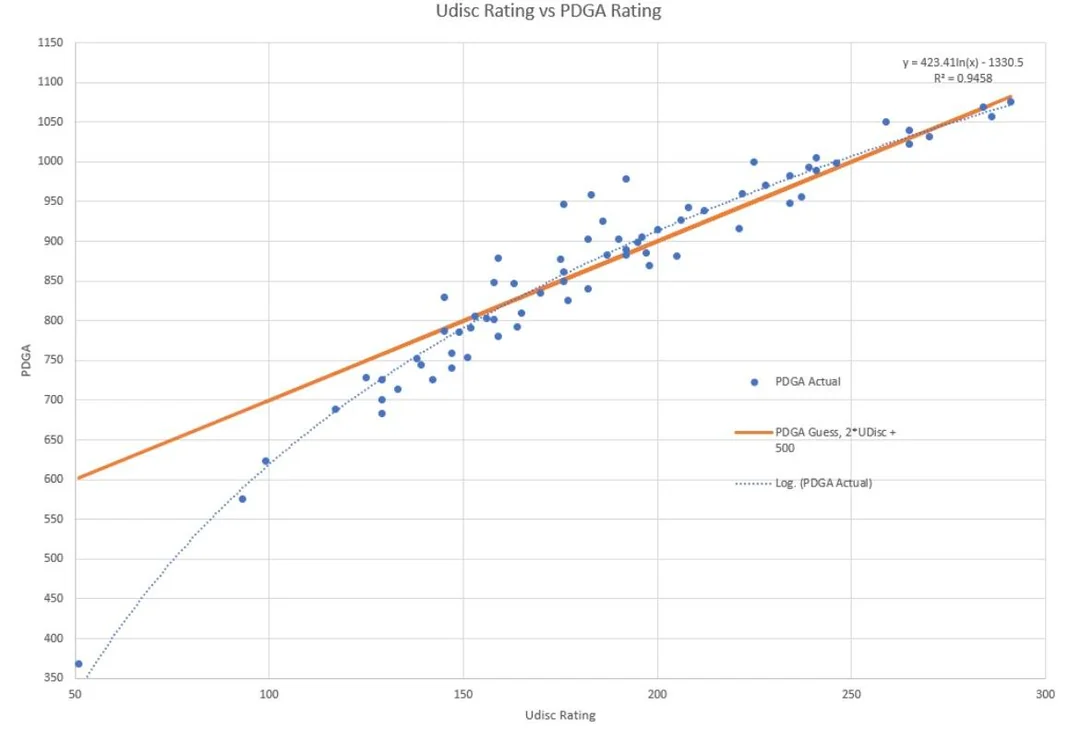

In [30]:
def udisc_rating_conversion(udisc_rating):
  """Converts a UDisc rating to a PDGA rating using the formula 423.41*ln(x) - 1330.5."""
  pdga_rating = 423.41 * math.log(udisc_rating) - 1330.5
  return pdga_rating